In [30]:
%pwd

'/home/yuhao/Documents/work/SUTD/AMM/codespace/AMMBench/build/benchmark/scripts/PCA'

In [13]:
import torch
import matplotlib.pyplot as plt

torch.ops.load_library("../../../libIntelliStream.so")

A = torch.load('/home/yuhao/Documents/work/SUTD/AMM/codespace/AMMBench/build/benchmark/scripts/PCA/results/scansketchDimension_datasetSIFT/crs/100/A.pt')
At = torch.load('/home/yuhao/Documents/work/SUTD/AMM/codespace/AMMBench/build/benchmark/scripts/PCA/results/scansketchDimension_datasetSIFT/crs/100/B.pt')

A.size(), At.size()

(torch.Size([128, 10000]), torch.Size([10000, 128]))

## Distribution

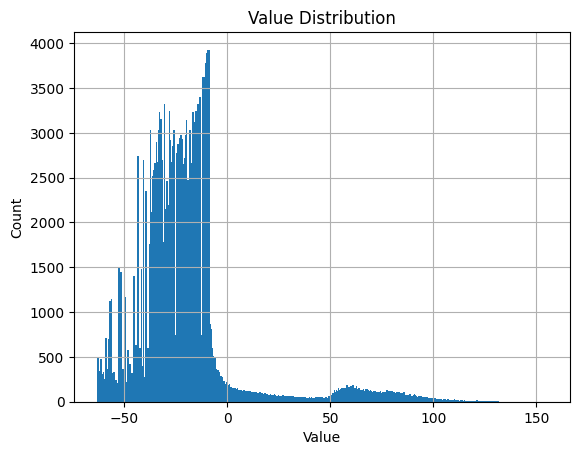

In [4]:
# Plot the histogram
unique_values, counts = torch.unique(A, return_counts=True)
plt.bar(unique_values, counts)

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Value Distribution')

plt.grid(True)

# Show the plot
plt.show()

## Eigenvalues

In [25]:
U, S, Vh = torch.linalg.svd(1/A.size()[1]*torch.matmul(A, A.t()))
U.shape, S.shape, Vh.shape

(torch.Size([128, 128]), torch.Size([128]), torch.Size([128, 128]))

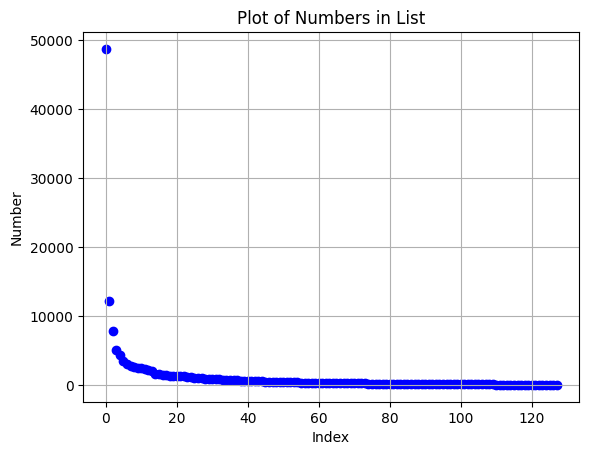

In [6]:
def plot_list_numbers(numbers):
    x = range(len(numbers))
    y = numbers

    plt.scatter(x, y, color='blue', marker='o')
    plt.xlabel('Index')
    plt.ylabel('Number')
    plt.title('Plot of Numbers in List')
    plt.grid(True)
    plt.show()

plot_list_numbers(S.numpy())

In [7]:
S[:10] 

tensor([48678.1406, 12178.2480,  7820.9775,  5152.5601,  4385.5215,  3449.1450,
         3008.2432,  2806.2397,  2573.7722,  2551.2161])

In [33]:
k = 5 # paper used k=5, we also use k=5
S[k]/S[0]

tensor(0.0709)

## Low rank approximation

In [34]:
Ak = torch.matmul(U[:,:k], torch.matmul(Vh[:k], A))

In [35]:
Uk, Sk, Vkh = torch.linalg.svd(1/A.size()[1]*torch.matmul((A-Ak), (A-Ak).t()))
Sk[0]

tensor(3449.1448)